# Importing the relevent packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Importing the data and pre-processing

In [2]:
raw_csv_data=pd.read_csv("Index2018.csv")

In [3]:
df_comp=raw_csv_data.copy()
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.date=pd.to_datetime(df_comp.date,dayfirst=True)
df_comp.set_index("date",inplace=True)
df_comp=df_comp.asfreq("b")
df_comp=df_comp.fillna(method="ffill") #fill the null values forward fill technique

size=int(len(df_comp)*0.8)  #whatever dataset given we will take 1st 80% of that as training data
df,df_test=df_comp.iloc[:size],df_comp.iloc[size:]
df["market_value"]=df_comp.ftse #we will take only ftse column and put it as market value
#df.market_value.pct_change(1)
del df_comp["spx"]
del df_comp["dax"]
del df_comp["ftse"]
del df_comp["nikkei"]

df["returns"]=df.market_value.pct_change(1).mul(100) #pct change(1)show period that is 1 day in our case
df=df.iloc[1:]

In [7]:
df.head()

,spx,dax,ftse,nikkei,market_value,returns
date,,,,,,
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166
1994-01-14,474.91,2151.05,3400.56,18973.70,3400.56,1.206842


In [6]:
df["returns"].head() #here negative values shows loss and positive shows gain

date
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
1994-01-14    1.206842
Freq: B, Name: returns, dtype: float64

# The DF_Test

### Test for Stationarity 

In [9]:
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts

In [10]:
#df["returns"]=df.market_values.pct_chage(1).mul(100)
#df=df.iloc[1:]

In [11]:
sts.adfuller(df.returns) #here p value is 7.798e-24 equal to zero than data is stationary

(-12.770265719497258,
 7.798058336037547e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.767245697501)

# LLR

In [32]:
def LLR_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

# this is the model to compare 2 model 1 and 2  from model 2 to 1 is there any significance improvement or not idf there is improvement we reject  null hypothysis

# ACF and PACF for Returns

In [13]:
import statsmodels.graphics.tsaplots as sgt

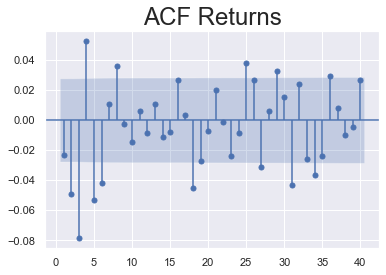

In [16]:
sgt.plot_acf(df.returns,lags=40,zero=False)
plt.title("ACF Returns",size=24)
plt.show()

#here dark  region is +2se and -2se we will consider only those lags which is out  of this dark region

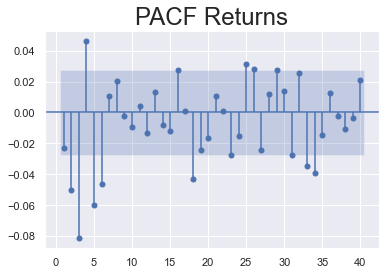

In [19]:
sgt.plot_pacf(df.returns,lags=40,zero=False,method=("ols"))
plt.title("PACF Returns",size=24)
plt.show()

# 6 is regionable here best model is AR(5) or AR(6)

In [20]:
from statsmodels.tsa.arima_model import ARMA

# AR(1) for Returns

In [21]:
model_ar1=ARMA(df.returns,order=(1,0)) #here MA is zero so we are building AR(1) model

In [24]:
results_ar1=model_ar1.fit()

In [25]:
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.749
Method:                       css-mle   S.D. of innovations              1.174
Date:                Wed, 06 Sep 2023   AIC                          15865.497
Time:                        14:27:02   BIC                          15885.061
Sample:                    01-10-1994   HQIC                         15872.353
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.159      0.247      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.631      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4387           +0.0000j           43.4387            0.5000
-----------------------------------------------------------------------------
"""

# Higher_lag AR Models for Returns

In [26]:
model_ar2=ARMA(df.returns,order=(2,0))
results_ar2=model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.456
Method:                       css-mle   S.D. of innovations              1.173
Date:                Wed, 06 Sep 2023   AIC                          15854.911
Time:                        14:32:34   BIC                          15880.996
Sample:                    01-10-1994   HQIC                         15864.052
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.220      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0500      0.014     -3.550      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2417           -4.4635j            4.4701           -0.2586
AR.2           -0.2417           +4.4635j            4.4701            0.2586
-----------------------------------------------------------------------------
"""

In [33]:
LLR_test(model_ar1,model_ar2)

0.0

In [34]:
model_ar3=ARMA(df.returns,order=(3,0))
results_ar3=model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.738
Method:                       css-mle   S.D. of innovations              1.169
Date:                Wed, 06 Sep 2023   AIC                          15823.477
Time:                        14:35:36   BIC                          15856.083
Sample:                    01-10-1994   HQIC                         15834.902
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.330      0.184      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.011      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.705      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.792      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9233           -2.0210j            2.2219           -0.1818
AR.2            0.9233           +2.0210j            2.2219            0.1818
AR.3           -2.4855           -0.0000j            2.4855           -0.5000
-----------------------------------------------------------------------------
"""

In [35]:
LLR_test(model_ar2,model_ar3)

0.0

In [36]:
model_ar4=ARMA(df.returns,order=(4,0))
results_ar4=model_ar4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(4, 0)   Log Likelihood               -7901.330
Method:                       css-mle   S.D. of innovations              1.168
Date:                Wed, 06 Sep 2023   AIC                          15814.661
Time:                        14:36:18   BIC                          15853.788
Sample:                    01-10-1994   HQIC                         15828.371
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.267      0.205      -0.010       0.048
ar.L1.returns    -0.0245      0.014     -1.739      0.082      -0.052       0.003
ar.L2.returns    -0.0496      0.014     -3.531      0.000      -0.077      -0.022
ar.L3.returns    -0.0802      0.014     -5.701      0.000      -0.108      -0.053
ar.L4.returns     0.0464      0.014      3.291      0.001       0.019       0.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8888           -0.0000j            1.8888           -0.5000
AR.2            0.3231           -1.9331j            1.9599           -0.2236
AR.3            0.3231           +1.9331j            1.9599            0.2236
AR.4            2.9701           -0.0000j            2.9701           -0.0000
-----------------------------------------------------------------------------
"""

In [37]:
LLR_test(model_ar3,model_ar4)

0.001

In [38]:
model_ar5=ARMA(df.returns,order=(5,0))
results_ar5=model_ar5.fit()
results_ar5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 0)   Log Likelihood               -7892.390
Method:                       css-mle   S.D. of innovations              1.166
Date:                Wed, 06 Sep 2023   AIC                          15798.779
Time:                        14:37:05   BIC                          15844.428
Sample:                    01-10-1994   HQIC                         15814.775
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.348      0.178      -0.009       0.046
ar.L1.returns    -0.0217      0.014     -1.544      0.123      -0.049       0.006
ar.L2.returns    -0.0544      0.014     -3.865      0.000      -0.082      -0.027
ar.L3.returns    -0.0831      0.014     -5.914      0.000      -0.111      -0.056
ar.L4.returns     0.0449      0.014      3.190      0.001       0.017       0.073
ar.L5.returns    -0.0596      0.014     -4.232      0.000      -0.087      -0.032
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5481           -0.0000j            1.5481           -0.5000
AR.2           -0.2860           -1.7252j            1.7487           -0.2761
AR.3           -0.2860           +1.7252j            1.7487            0.2761
AR.4            1.4366           -1.2157j            1.8819           -0.1118
AR.5            1.4366           +1.2157j            1.8819            0.1118
-----------------------------------------------------------------------------
"""

In [39]:
LLR_test(model_ar4,model_ar5)

0.0

In [40]:
model_ar6=ARMA(df.returns,order=(6,0))
results_ar6=model_ar6.fit()
results_ar6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.945
Method:                       css-mle   S.D. of innovations              1.164
Date:                Wed, 06 Sep 2023   AIC                          15789.890
Time:                        14:37:53   BIC                          15842.059
Sample:                    01-10-1994   HQIC                         15808.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.414      0.157      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.740      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     -3.716      0.000      -0.080      -0.025
ar.L3.returns    -0.0870      0.014     -6.174      0.000      -0.115      -0.059
ar.L4.returns     0.0424      0.014      3.009      0.003       0.015       0.070
ar.L5.returns    -0.0607      0.014     -4.309      0.000      -0.088      -0.033
ar.L6.returns    -0.0466      0.014     -3.302      0.001      -0.074      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2869           -0.9022j            1.5716           -0.0973
AR.2            1.2869           +0.9022j            1.5716            0.0973
AR.3           -0.0727           -1.5282j            1.5299           -0.2576
AR.4           -0.0727           +1.5282j            1.5299            0.2576
AR.5           -1.8659           -0.4836j            1.9275           -0.4596
AR.6           -1.8659           +0.4836j            1.9275            0.4596
-----------------------------------------------------------------------------
"""

In [42]:
LLR_test(model_ar5,model_ar6)

0.001

In [43]:
model_ar7=ARMA(df.returns,order=(7,0))
results_ar7=model_ar7.fit()
results_ar7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.647
Method:                       css-mle   S.D. of innovations              1.164
Date:                Wed, 06 Sep 2023   AIC                          15791.294
Time:                        14:38:36   BIC                          15849.985
Sample:                    01-10-1994   HQIC                         15811.860
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.399      0.162      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.702      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.663      0.000      -0.079      -0.024
ar.L3.returns    -0.0874      0.014     -6.202      0.000      -0.115      -0.060
ar.L4.returns     0.0433      0.014      3.064      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.263      0.000      -0.088      -0.032
ar.L6.returns    -0.0463      0.014     -3.282      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.772      0.440      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6490           -0.5384j            1.7347           -0.4498
AR.2           -1.6490           +0.5384j            1.7347            0.4498
AR.3           -0.1189           -1.4954j            1.5001           -0.2626
AR.4           -0.1189           +1.4954j            1.5001            0.2626
AR.5            1.2790           -0.9786j            1.6105           -0.1039
AR.6            1.2790           +0.9786j            1.6105            0.1039
AR.7            5.2269           -0.0000j            5.2269           -0.0000
-----------------------------------------------------------------------------
"""

In [44]:
LLR_test(model_ar6,model_ar7) #there is no improvement

0.44

# Analysis the Residuals

In [45]:
df["res_ret"]=results_ar6.resid

In [46]:
df.res_ret.mean() #mean is almost zero 

-5.3735243268991316e-05

In [47]:
df.res_ret.var()

1.3559802110697527

# Residuals must be stationary

In [48]:
sts.adfuller(df.res_ret) #p value 0 means residual is stationary and there is no variance

(-70.78380136715367,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15692.570834134782)

# No autocorrelation between residual

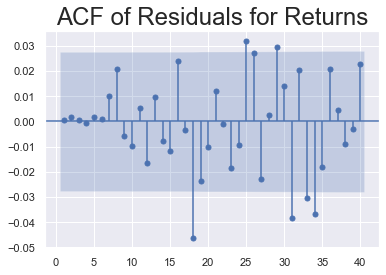

In [49]:
sgt.plot_acf(df.res_ret,zero=False,lags=40)
plt.title("ACF of Residuals for Returns",size=24)
plt.show()

# as we can see 1stly 10 15 lags there is no autocorrelation

# Residuals must be random

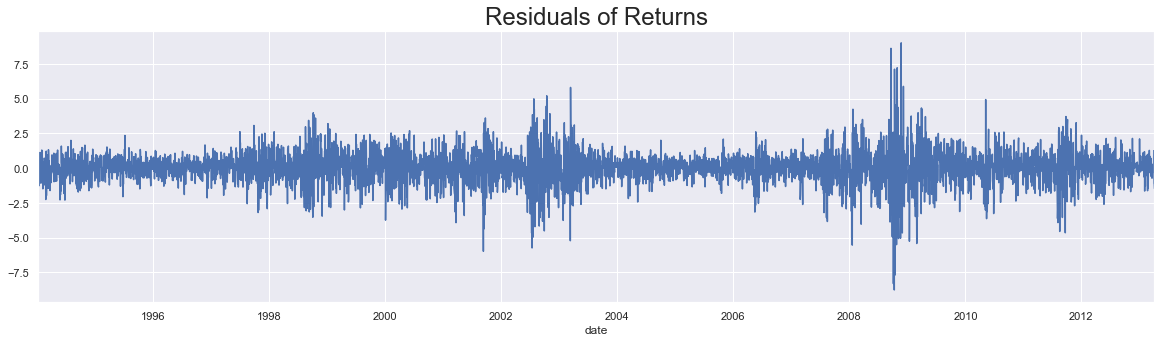

In [51]:
df.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns",size=24)
plt.show()

#residual is random there is no pattern

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
model_AR = AutoReg(train, lags=20)
model_fit = model_AR.fit()

predictions_AR = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
rmse_predicted_AR = np.sqrt(np.abs((test-predictions_AR)**2)).mean()
print("rmse value for AR Mdel:", rmse_predicted_AR)

plt.figure(figsize = (10,5))
predictions_AR.plot()
test.plot()
plt.legend(['predicted', 'actual'])
plt.show()